In [116]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline 

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [93]:
df_1= pd.read_csv("data/HD_Data_1.csv")
df_1.shape

(3674, 16)

In [94]:
pd.set_option("display.max_columns", None)

In [95]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


In [96]:
df_1.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [98]:
df_1.isna().sum() #checking for missing datas

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [100]:
df_1.duplicated().sum() #Checking for duplicate datas

15

In [101]:
df_1.drop_duplicates(inplace=True) #Removing duplicate datas

In [102]:
df_1.duplicated().sum() 

0

In [103]:
# Filling missing data with mode
df_1['sex'].fillna(df_1['sex'].mode()[0], inplace=True) 
df_1['smokingStatus'].fillna(df_1['smokingStatus'].mode()[0], inplace=True)

In [104]:
df_1.isna().sum() #checking for missing datas again

sex                0
age                0
education          0
smokingStatus      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CHDRisk            0
dtype: int64

In [105]:
df_1.shape

(3659, 16)

In [106]:
df_1.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [107]:
print(df_1['sex'].unique())
print(df_1['smokingStatus'].unique()) 
print(df_1['diabetes'].unique()) 
print(df_1['CHDRisk'].unique()) 

['male' 'female']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [108]:
df_1['sex'] = df_1['sex'].str.strip().str.lower()
df_1['smokingStatus'] = df_1['smokingStatus'].str.strip().str.lower()
df_1['diabetes'] = df_1['diabetes'].str.strip().str.lower()
df_1['CHDRisk'] = df_1['CHDRisk'].str.strip().str.lower()

df_1['sex'] = df_1['sex'].map({'female': 0, 'male': 1})
df_1['smokingStatus'] = df_1['smokingStatus'].map({'no': 0, 'yes': 1})
df_1['diabetes'] = df_1['diabetes'].map({'no': 0, 'yes': 1})
df_1['CHDRisk'] = df_1['CHDRisk'].map({'no': 0, 'yes': 1})

print(df_1)
print(df_1.isnull().sum())

      sex  age  education  smokingStatus  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39          4              0           0       0                0   
1       0   46          2              0           0       0                0   
2       1   48          1              1          20       0                0   
3       0   61          3              1          30       0                0   
4       0   46          3              1          23       0                0   
...   ...  ...        ...            ...         ...     ...              ...   
3654    1   51          3              0          43       0                0   
3655    0   52          2              0           0       0                0   
3656    0   47          4              1          20       0                0   
3657    0   58          1              0           0       0                0   
3673    1   50          2              1          25       0                0   

      prevalentHyp  diabete

In [109]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3659 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3659 non-null   int64  
 1   age              3659 non-null   int64  
 2   education        3659 non-null   int64  
 3   smokingStatus    3659 non-null   int64  
 4   cigsPerDay       3659 non-null   int64  
 5   BPMeds           3659 non-null   int64  
 6   prevalentStroke  3659 non-null   int64  
 7   prevalentHyp     3659 non-null   int64  
 8   diabetes         3659 non-null   int64  
 9   totChol          3659 non-null   int64  
 10  sysBP            3659 non-null   float64
 11  diaBP            3659 non-null   float64
 12  BMI              3659 non-null   float64
 13  heartRate        3659 non-null   int64  
 14  glucose          3659 non-null   int64  
 15  CHDRisk          3659 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 486.0 KB


In [110]:
df_1.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


## Gender Distribution

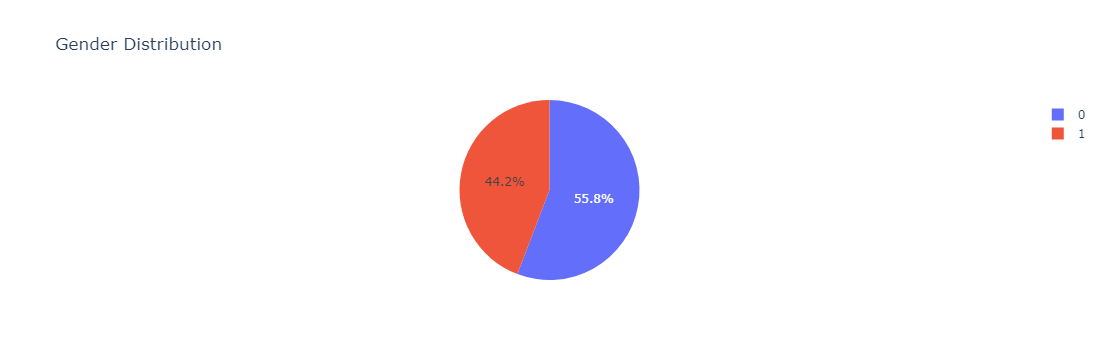

In [111]:
plt = px.pie(df_1, names='sex', title='Gender Distribution')
plt.show()

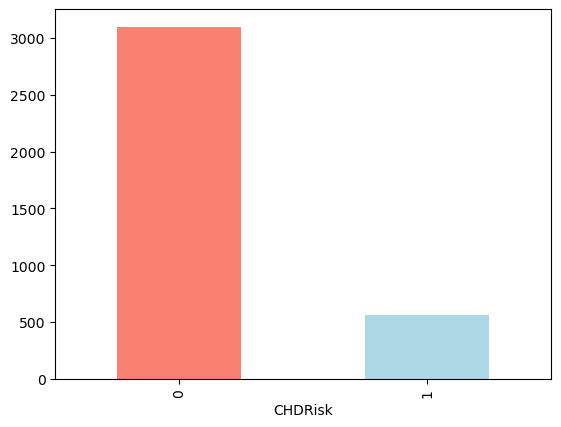

In [112]:
df_1["CHDRisk"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [113]:
pd.crosstab(df_1["CHDRisk"], df_1["sex"])

sex,0,1
CHDRisk,,
0,1789,1310
1,253,307


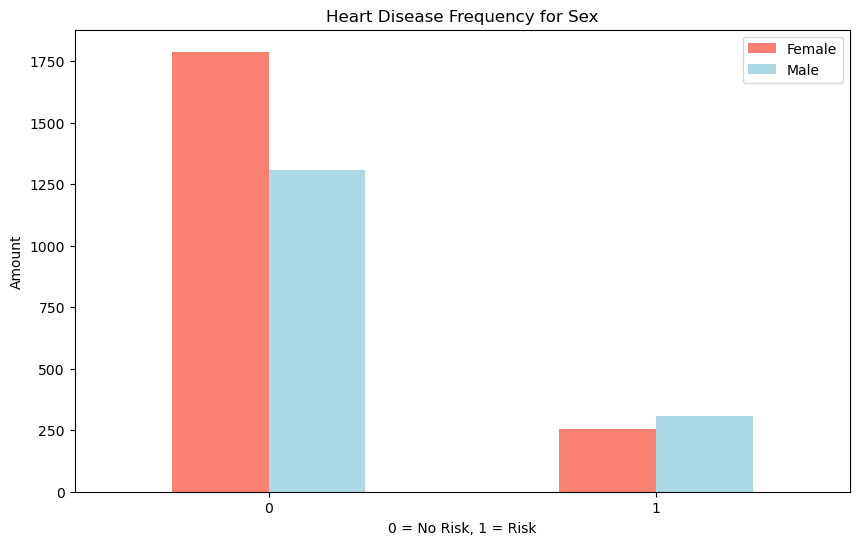

In [117]:
pd.crosstab(df_1["CHDRisk"], df_1["sex"]).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Risk, 1 = Risk")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Modeling

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [119]:
df_1.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [120]:
df_1.isna().sum()

sex                0
age                0
education          0
smokingStatus      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CHDRisk            0
dtype: int64

In [121]:
X = df_1.drop("CHDRisk",axis=1)
y = df_1["CHDRisk"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
X_test.shape

(732, 15)

In [124]:
y_test, len(y_test)

(291     0
 270     0
 149     0
 1188    0
 2037    0
        ..
 31      0
 1284    0
 2645    0
 3406    0
 610     0
 Name: CHDRisk, Length: 732, dtype: int64,
 732)

In [125]:
len(X_train), len(y_train)

(2927, 2927)

## Creating Models

In [126]:
# creating dict to store the models
models ={"Random Forest Classifier": RandomForestClassifier(),
         "Logistic Regression" : LogisticRegression(max_iter=3000),
         "SVM" : SVC(),
         "Decision Tree": DecisionTreeClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores={}

    for name, model in models.items():
        #fit model to data
        model.fit(X_train, y_train)

        #Evaluate the model 
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


In [128]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Random Forest Classifier': 0.8346994535519126,
 'Logistic Regression': 0.837431693989071,
 'SVM': 0.8306010928961749,
 'Decision Tree': 0.75}

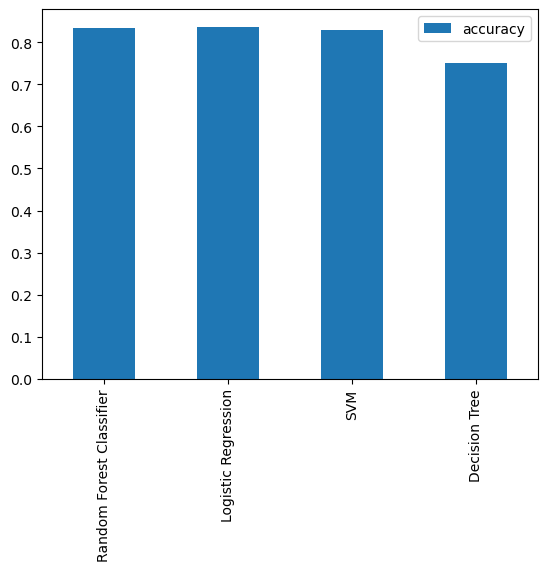

In [129]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning

Tuning hyperparameters using RandomizedSearchCV and GridSearchCV for LogisticRegression and RandomForestClassifierchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [131]:
# Create a hyperparameter grid for LogisticRegression
lr_grid =  {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear","saga"],
            "penalty": ["l1","l2"],
            "max_iter": np.arange(100,1000,100)
           }

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), # Number of trees
           "max_depth": [None, 10, 20, 30, 50],  # Maximum depth of the trees
           "min_samples_split": np.arange(2, 20, 2), # Minimum number of samples required to split an internal node
           "min_samples_leaf": np.arange(1, 20, 2), # Minimum number of samples required to be at a leaf node
           "max_features": ["sqrt", "log2", None],  # Number of features to consider when looking for the best split
           "bootstrap": [True, False],  # Whether to use bootstrap sampling
} 

In [179]:
lr = LogisticRegression(random_state=42)

# RandomizedSearchCV for LogisticRegression
lr_random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=lr_grid,
    n_iter=20,
    scoring='accuracy',
    cv=7,
    verbose=True,
    random_state=42,
    n_jobs=-1
)

lr_random_search.fit(X_train, y_train)

print("Best Parameters for LogisticRegression:", lr_random_search.best_params_)
print("Best Score for LogisticRegression:", lr_random_search.best_score_)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
Best Parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 800, 'C': 1.623776739188721}
Best Score for LogisticRegression: 0.8554846108545392


In [133]:
rf = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',  # Scoring metric
    cv=7,  # Cross-validation splits
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

rf_random_search.fit(X_train, y_train)

print("Best Parameters for RandomForest:", rf_random_search.best_params_)
print("Best Score for RandomForest:", rf_random_search.best_score_)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
Best Parameters for RandomForest: {'n_estimators': 210, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Score for RandomForest: 0.8544593203555646


In [136]:
print("Best Parameters for LogisticRegression:", lr_random_search.best_params_)

Best Parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 800, 'C': 1.623776739188721}


In [180]:
lr_random_search.score(X_test,y_test)

0.8306010928961749

In [181]:
rf_random_search.score(X_test,y_test)

0.8292349726775956

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [183]:
log_reg_grid = {'penalty': ['l1', 'l2'],  # Regularization terms
                'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
                'solver': ['liblinear', 'saga'] }

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    estimator=lr,
    param_grid=log_reg_grid,
    cv=7,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # Progress log
    n_jobs=-1)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 7 folds for each of 80 candidates, totalling 560 fits


In [184]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'penalty': 'l2', 'solver': 'liblinear'}

In [185]:
gs_log_reg.score(X_test, y_test)

0.8387978142076503

## Evaluating trained models with Evaluation metrics

Our best model is logistic regression with hyperparameters tuned with GridSearchCV, we will evaluate this model.

In [186]:
y_preds = gs_log_reg.predict(X_test)

In [187]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [193]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds, average='binary')  # Use 'macro' or 'weighted' for multi-class.
recall = recall_score(y_test, y_preds, average='binary')
f1 = f1_score(y_test, y_preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8388
Precision: 0.7500
Recall: 0.0726
F1 Score: 0.1324


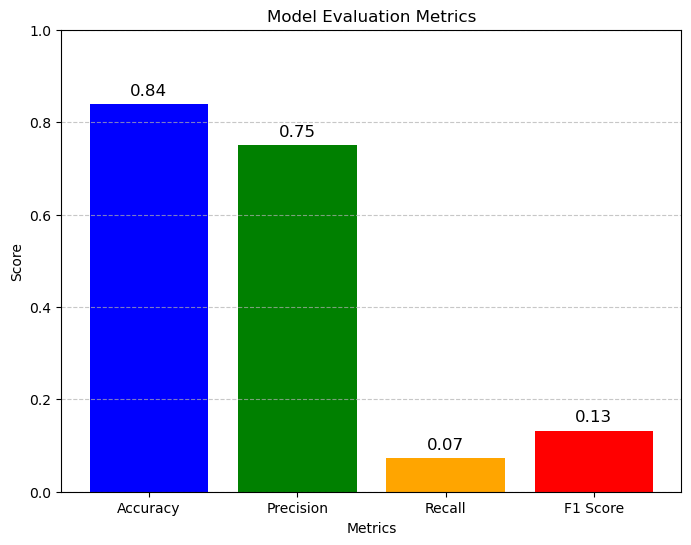

In [194]:
# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with value
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

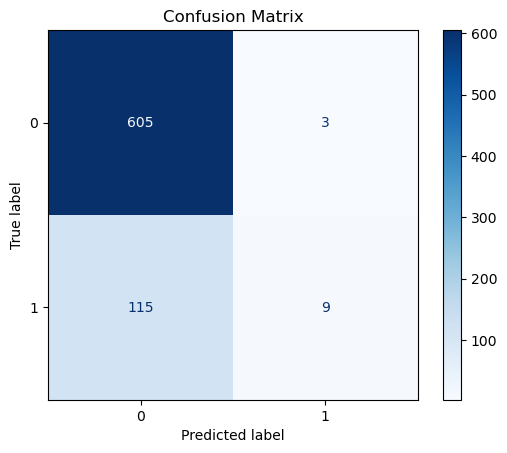

In [196]:
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Our model predominantly predicts 0s ("True Negatives") but struggles to accurately predict 1s ("True Positives"). This issue arises because our dataset is heavily imbalanced, with a majority of samples belonging to the 0 class. As a result, the model fails to learn meaningful patterns between the independent features and the dependent feature for the minority class, leading to poor performance in identifying 1s.